## 統計學習HW1 KNN_Regressor

In [2]:
#第一題
#Q1.1
# 根據題目訂出我自己的knn_regressor Class
import numpy as np

class myknn_regressor():
    
    def __init__(self,k,f):
        self.k = int(k)
        self.f = f
        
    def fit(self, X, y):
        self.data = X
        self.targets = y
        
    def euclidean_distance(self, X):   #先將euclidean_distance的距離公式寫好 以等等判斷最近的鄰居點
        n_samples, _ = X.shape
        l2 = [np.sqrt(np.sum((self.data - X[i])**2, axis=1)) for i in range(n_samples)]
        return np.array(l2)

    def predict(self, X):
        # step 1: 計算出input data 跟training data 的距離
        dists = self.euclidean_distance(X)
        k = self.k
        
        # step 2: find the k nearest neighbors
        #如果輸入k>10而且指定f為remove_outliers法 則預測方式如下
        if (k > 10) and (self.f == "remove_outliers"):  
            knn = np.argsort(dists)[:, :k]   #找出距離最近k個鄰居點的索引值
            y_knn = self.targets[knn]   #並根據索引值代入至 training data的 target 找出要拿來預測用的k個值
            y_Q1 = np.quantile(y_knn, 0.25, axis=1)  #算出k個 target值的第一四分位數
            y_Q3 = np.quantile(y_knn, 0.75, axis=1)  #算出k個 target值的第三四分位數
            IOR  = y_Q3 - y_Q1
            lower= y_Q1-IOR*1.5  #根據第一四分位數和第三四分位數 算出我們定義outliners 的下限
            upper= y_Q3+IOR*1.5  #根據第一四分位數和第三四分位數 算出我們定義outliners 的上限
            y_knn_list=[]
            
        #用我們定義outliners的上下限來判斷要不要將k個target裡面的值排除掉，如果超過區間則排出，再計算其他剩下值的平均並以此當作預測值
            for i in range(len(y_knn)):
                y_knn_row=y_knn[i][~(np.logical_or(y_knn[i]>upper[i], y_knn[i]<lower[i]))]
                y_knn_list.append(np.mean(y_knn_row))
            return np.array(y_knn_list)
        
        #如果不是如上面指定的預測方式，或是k點數量小於10，則直接回傳最近k個鄰居點的平均值 
        else:    
            knn = np.argsort(dists)[:, :k]
            y_knn = self.targets[knn]
            return np.mean(y_knn,axis=1) 
         

In [3]:
#Q1.2
#載入套件 並讀入資料集
import pickle

with open('msd_data1.pickle','rb') as f:
    myobj = pickle.load(f)

In [4]:
myobj

{'X_train': array([[  53.39967,   56.67781,   55.63508, ...,    1.3159 ,    2.37448,
            1.85999],
        [  42.83464,  -33.90478,   38.97704, ...,    9.72827, -175.51446,
          -15.8389 ],
        [  49.88591,   23.30563,   54.79012, ...,    1.94152,  101.27241,
            8.99355],
        ...,
        [  41.04397,  -96.30727,   56.8073 , ...,    3.60251,  -97.24809,
           -5.80797],
        [  42.8676 ,   43.36365,   29.17957, ...,   18.71014,  208.9029 ,
          -11.08426],
        [  36.57558,   29.8733 ,   -3.08101, ...,   21.0417 ,  106.60317,
            3.44396]]),
 'Y_train': array([1996., 2001., 2003., ..., 2009., 1982., 1981.]),
 'X_test': array([[  38.51784,   55.38723,   10.31652, ...,    6.66624,  -73.75585,
            9.47857],
        [  44.7309 ,   46.25776,    8.55636, ...,    4.5564 ,   53.49956,
            5.39116],
        [  43.08912,   45.70197,   17.18467, ...,  -13.64909,   -7.42137,
           -4.97266],
        ...,
        [  39.81814

In [5]:
print(myobj['X_train'].shape)
print(myobj['Y_train'].shape)
print(myobj['X_test'].shape)
print(myobj['Y_test'].shape)

(5000, 90)
(5000,)
(3000, 90)
(3000,)


In [6]:
X_train=myobj['X_train']
Y_train=myobj['Y_train']
X_test=myobj['X_test']
Y_test=myobj['Y_test']

In [7]:
#定義出標準化的函數
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

In [8]:
#將要來預測的X_feature標準化
X_train_standard=standardization(X_train)
X_test_standard=standardization(X_test)

In [9]:
#定義出RMSE的函數
def RMSE(y, y_pred):
    mse = np.mean((y - y_pred)**2) 
    return  np.sqrt(mse)

In [10]:
#將標準化的training data訓練myknn_regressor並以 equal_weight方式 來預測目標target value
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train_standard, Y_train)
ypred = myknn.predict(X_test_standard)

In [11]:
#印出RMSE
print(RMSE(Y_test,ypred))

10.292158827638316


In [12]:
#並印出前20筆的預測值
print(ypred[:20])

[1992.9  1994.05 2000.05 1991.5  1992.8  1998.5  1987.1  1990.9  2001.8
 2003.   2001.15 1998.65 1995.55 1997.2  1995.05 1997.35 1992.15 1999.1
 2003.6  1995.75]


In [13]:
#Q1.3
#將標準化的training data訓練myknn_regressor並以 remove_outliers方式 來預測目標target value
myknn2 = myknn_regressor(20, "remove_outliers")
myknn2.fit(X_train_standard, Y_train)
ypred2 = myknn2.predict(X_test_standard)

In [14]:
#印出RMSE
print(RMSE(Y_test,ypred2))

10.225720983625129


In [15]:
#並印出前20筆的預測值
print(ypred2[:20])

[1992.9        1994.05       2000.05       1992.73684211 1992.8
 2000.         1987.1        1990.9        2001.8        2003.94736842
 2001.15       2000.94444444 1995.55       1997.2        1998.61111111
 1997.35       1992.15       2004.23529412 2003.6        1995.75      ]


In [16]:
#第二題
#載入sklearn 的knn regressor
#並建立k的list以等等tune出最佳表現的k值
from sklearn.neighbors import KNeighborsRegressor
𝑘_range = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

In [17]:
# Case1 第一個case為用sklearn的knn regressor
#將標準化的training data訓練sklearn的knn regressor來預測目標target value 並印出不同k值所產生的RSME
Knn1_list=[]
for i in k_range:
    Knn1 = KNeighborsRegressor(n_neighbors=i)
    Knn1.fit(X_train_standard, Y_train) 
    ypred3= Knn1.predict(X_test_standard)
    Knn1_list.append(RMSE(Y_test,ypred3))

In [18]:
Knn1_list

[13.94019368588543,
 12.097861381252473,
 11.448255568232025,
 11.043653909221652,
 10.900440969673351,
 10.46269085847422,
 10.359457586258149,
 10.292158827638316,
 10.261870966511582,
 10.257804039057469,
 10.235202506063867,
 10.209997388181186,
 10.204546360311813,
 10.228160003962914,
 10.232596529500087,
 10.242063661955804,
 10.245796391589902,
 10.260879617914505,
 10.284962306823381,
 10.299767106540788,
 10.318954408812253,
 10.347841640420786,
 10.370087243686365]

In [19]:
# Case2  第二個case為用sklearn的knn regressor
#將沒有標準化的training data訓練sklearn的knn regressor來預測目標target value 並印出不同k值所產生的RSME
Knn2_list=[]
for i in k_range:
    Knn2 = KNeighborsRegressor(n_neighbors=i)
    Knn2.fit(X_train, Y_train) 
    ypred4= Knn2.predict(X_test)
    Knn2_list.append(RMSE(Y_test,ypred4))

In [20]:
Knn2_list

[14.923638966418345,
 12.777499755429464,
 12.075674967716129,
 11.767805657810635,
 11.466392632384432,
 11.07746090040493,
 10.888979137947995,
 10.797788546734928,
 10.79007301797969,
 10.75026561256701,
 10.717738719772289,
 10.714437504678756,
 10.698494013475852,
 10.69110105960404,
 10.682608734124413,
 10.672535729098724,
 10.662907517124493,
 10.67701950452466,
 10.683139638996407,
 10.687017556442052,
 10.691630026202155,
 10.69071978380711,
 10.698853374700175]

In [21]:
# Case3  第三個case為用myknn_regressor
#將標準化的training data訓練myknn_regressor並以 remove_outliers方式 來預測目標target value 並印出不同k值所產生的RSME
Knn3_list=[]
for i in k_range:
    Knn3 = myknn_regressor(i,"remove_outliers")
    Knn3.fit(X_train_standard, Y_train) 
    ypred5= Knn3.predict(X_test_standard)
    Knn3_list.append(RMSE(Y_test,ypred5))

In [22]:
Knn3_list

[13.94019368588543,
 12.097861381252473,
 11.448255568232025,
 11.043653909221652,
 10.900440969673351,
 10.46269085847422,
 10.343823629898093,
 10.225720983625129,
 10.213345451143018,
 10.188079193609305,
 10.161597862384458,
 10.095243787687673,
 10.056682304105307,
 10.089018275220825,
 10.076818047624425,
 10.089731397690318,
 10.067742577227309,
 10.063088284816118,
 10.088531815151665,
 10.10597373451231,
 10.109055850913563,
 10.14313493144064,
 10.170153335037124]

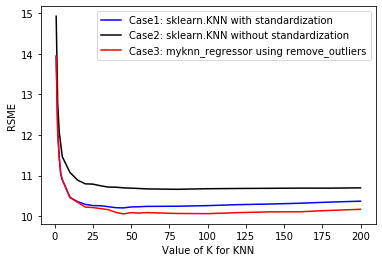

In [28]:
#最後將三種不同的Case，根據k值產生出不同的RSME的直線圖，畫在同一個圖中進行模型的好壞比較
import matplotlib.pyplot as plt
line1, = plt.plot(k_range, Knn1_list, "blue", label= "Case1: sklearn.KNN with standardization")
line2, = plt.plot(k_range, Knn2_list, "black", label= "Case2: sklearn.KNN without standardization")
line3, = plt.plot(k_range, Knn3_list, "red", label= "Case3: myknn_regressor using remove_outliers")
plt.legend()
plt.xlabel("Value of K for KNN")  
plt.ylabel("RSME")  
plt.show() 

由最後的結果可以觀察出：

1.如果沒有將feature標準化的話，模型表現會較差，容易預測不準

2.以我自己建立的 knn_regressor由於有將outliners排除，因此RSME在K值大於25以後比sklearn的knn regressor來得小，表現三者之中最佳

3.在我自己建立的 knn_regressor在K值不大於10之前，由於計算距離以及根據最近鄰居，預測方法皆是取平均，演算法與sklearn差不多，因此RSME都差不多，模型表現差不多，也說明outliners排除法要在K值有一定大小時，才有真正達到將outliners排除以利預測更準之效果